#### 1. Import pandas library

In [1]:
import pandas as pd

#### 2. Load data (users.csv, posts.csv)

In [59]:
df=pd.read_csv("C:/Users/AaronElias/Desktop/Github/Prueba-Aaron/13-lab-pandas-data-cleaning/your-code/users.csv")
df1=pd.read_csv("C:/Users/AaronElias/Desktop/Github/Prueba-Aaron/13-lab-pandas-data-cleaning/your-code/posts.csv")

In [65]:
df.head(2)
df1.head(2)

,id,owner_user_id,score,view_count,comment_count,favorite_count
0,30336926,NaN,1,14,3,NaN
1,36873524,NaN,1,18,0,1.0


#### 3. Rename id column to user_id

In [69]:
df.rename(columns={'id':'user_id'},inplace=True)
df

,Unnamed: 0,user_id,display_name,about_me,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,views,profile_image_url,website_url
0,0,107658,ivordesign,NaN,NaN,2009-05-15 12:21:51.230000+00:00,2014-08-28 17:43:18.040000+00:00,United Kingdom,305,2,0,91,NaN,http://www.ivorthedesigner.co.uk
1,1,218597,icabod,NaN,NaN,2009-11-25 13:30:42.460000+00:00,2020-05-29 11:44:18.140000+00:00,United Kingdom,6559,361,25,374,NaN,http://icablog.org/
2,2,326360,rbaker86,<p>Software developer and technology enthusias...,NaN,2010-04-26 21:18:19.857000+00:00,2017-12-04 16:49:29.297000+00:00,United Kingdom,1802,40,14,97,NaN,http://na
3,3,379556,Rui Marques,<p>Engineer and Automation Architect at Vonage...,NaN,2010-06-29 23:32:49.870000+00:00,2020-05-28 14:49:23.427000+00:00,United Kingdom,2335,125,10,261,NaN,http://ruimarques.io
4,4,450456,Jules,NaN,NaN,2010-09-17 09:47:09.397000+00:00,2020-05-13 07:03:58.113000+00:00,United Kingdom,7746,256,50,3598,https://i.stack.imgur.com/4Y8Zf.jpg?s=128&g=1,https://www.julesmoorhouse.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14843,14843,574332,Captain Caveman,NaN,NaN,2011-01-13 14:08:49.653000+00:00,2018-05-24 20:33:44.657000+00:00,United Kingdom,41,10,0,6,NaN,NaN
14844,14844,7155452,Mode-X,<p>Just getting into Android App development. ...,NaN,2016-11-14 06:43:00.503000+00:00,2019-02-05 22:05:38.527000+00:00,United Kingdom,41,0,0,6,https://www.gravatar.com/avatar/0abeeedd0dd8d3...,NaN
14845,14845,5529001,V.Savage,NaN,NaN,2015-11-05 11:28:05.457000+00:00,2016-03-09 12:16:33.497000+00:00,United Kingdom,41,0,0,11,https://i.stack.imgur.com/tSAyG.jpg,NaN
14846,14846,4105549,Tom Baker,"<p>Support Developer</p>\r\n\r\n<p>Using,</p>\...",NaN,2014-09-26 10:43:52.033000+00:00,2020-05-27 15:34:09.103000+00:00,United Kingdom,41,2,0,11,https://www.gravatar.com/avatar/19c36d2481ad65...,http://N/A


#### 4. Rename id column to post_id and owner_user_id to user_id

In [67]:
df1.rename(columns={'id':'post_id'},inplace=True)
df1.rename(columns={'owner_user_id':'user_id'},inplace=True)
df1

,post_id,user_id,score,view_count,comment_count,favorite_count
0,30336926,NaN,1,14,3,NaN
1,36873524,NaN,1,18,0,1.0
2,36605876,NaN,1,19,0,NaN
3,36718461,NaN,1,17,0,NaN
4,30434893,NaN,0,15,0,NaN
...,...,...,...,...,...,...
325605,37142382,6315949.0,0,15,0,1.0
325606,36884286,3733872.0,0,20,1,1.0
325607,36140188,5216651.0,0,12,0,1.0
325608,36293699,4811040.0,1,20,1,1.0


#### 5. Define new dataframes for users and posts with the following selected columns:
    **users columns**: user_id, reputation,views,up_votes,down_votes
    **posts columns**: post_id, score,user_id,view_count,comment_count

In [74]:

a=[df["user_id"],df["reputation"],df["views"],df["up_votes"],df["down_votes"]]
users=pd.concat(a, axis=1)
users

,user_id,reputation,views,up_votes,down_votes
0,107658,305,91,2,0
1,218597,6559,374,361,25
2,326360,1802,97,40,14
3,379556,2335,261,125,10
4,450456,7746,3598,256,50
...,...,...,...,...,...
14843,574332,41,6,10,0
14844,7155452,41,6,0,0
14845,5529001,41,11,0,0
14846,4105549,41,11,2,0


In [73]:
b=[df1["post_id"],df1["user_id"],df1["view_count"],df1["comment_count"]]
post=pd.concat(b,axis=1 )
post

,post_id,user_id,view_count,comment_count
0,30336926,NaN,14,3
1,36873524,NaN,18,0
2,36605876,NaN,19,0
3,36718461,NaN,17,0
4,30434893,NaN,15,0
...,...,...,...,...
325605,37142382,6315949.0,15,0
325606,36884286,3733872.0,20,1
325607,36140188,5216651.0,12,0
325608,36293699,4811040.0,20,1


#### 6. Merge both dataframes, users and posts. 
You will need to make a [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) of posts and users dataframes.

In [82]:
new= pd.merge(users, post, on=None, how='outer')

In [83]:
new

,user_id,reputation,views,up_votes,down_votes,post_id,view_count,comment_count
0,107658.0,305.0,91.0,2.0,0.0,NaN,NaN,NaN
1,218597.0,6559.0,374.0,361.0,25.0,NaN,NaN,NaN
2,326360.0,1802.0,97.0,40.0,14.0,NaN,NaN,NaN
3,379556.0,2335.0,261.0,125.0,10.0,NaN,NaN,NaN
4,450456.0,7746.0,3598.0,256.0,50.0,34989087.0,19.0,0.0
...,...,...,...,...,...,...,...,...
339789,1548031.0,NaN,NaN,NaN,NaN,37430490.0,18.0,0.0
339790,6410068.0,NaN,NaN,NaN,NaN,37571969.0,15.0,0.0
339791,6315949.0,NaN,NaN,NaN,NaN,37142382.0,15.0,0.0
339792,3733872.0,NaN,NaN,NaN,NaN,36884286.0,20.0,1.0


#### 7. How many missing values do you have in your merged dataframe? 

In [81]:
new.fillna('unknown', inplace=True)
new

,user_id,reputation,views,up_votes,down_votes,post_id,view_count,comment_count
0,107658,305,91,2,0,unknown,unknown,unknown
1,218597,6559,374,361,25,unknown,unknown,unknown
2,326360,1802,97,40,14,unknown,unknown,unknown
3,379556,2335,261,125,10,unknown,unknown,unknown
4,450456,7746,3598,256,50,3.49891e+07,19,0
...,...,...,...,...,...,...,...,...
339789,1.54803e+06,unknown,unknown,unknown,unknown,3.74305e+07,18,0
339790,6.41007e+06,unknown,unknown,unknown,unknown,3.7572e+07,15,0
339791,6.31595e+06,unknown,unknown,unknown,unknown,3.71424e+07,15,0
339792,3.73387e+06,unknown,unknown,unknown,unknown,3.68843e+07,20,1


There are no missing values

#### Bonus: Identify extreme values in your merged dataframe, create a dataframe called outliers with the same columns as our data set and calculate the bounds. The values of the outliers dataframe will be the values of the merged_df that fall outside that bounds. You will need to save your outliers dataframe to a csv file on your-code folder. Hint: post_id cannot have outliers!

In [91]:
import seaborn as sns
import matplotlib as plt

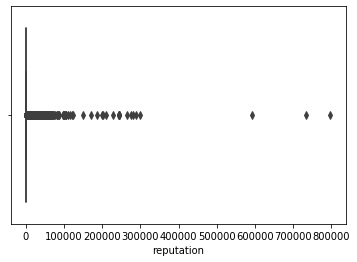

In [86]:
sns.boxplot(x=new['reputation'])

In [92]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(new['reputacion'], new['views'])
ax.set_xlabel('Reputation score')
ax.set_ylabel('number of views')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'